In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", font="Times New Roman")

In [8]:
data = pd.read_csv("/Users/sjb373/data/secure-compression-framework-lib/evaluation/stats/whatsapp_stats_complete.csv")
data["compression_ratio"] = data.raw_bytes/data.compressed_bytes
data["simple_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_simple
data["advanced_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_advanced
data["raw_bytes_mb"] = data.raw_bytes/1000000
data.head()

,n,m,dist,raw_bytes,compressed_bytes,safe_compressed_bytes_simple,safe_compressed_bytes_advanced,compression_ratio,simple_safe_compression_ratio,advanced_safe_compression_ratio,raw_bytes_mb
0,5,1000,even,1302528,129179,201558,-1,10.083125,6.462299,-1302528.0,1.302528
1,5,1000,random,1298432,129188,202786,-1,10.050717,6.402967,-1298432.0,1.298432
2,5,1000,long_tail,1298432,128337,213750,-1,10.117363,6.074536,-1298432.0,1.298432
3,5,5000,even,2199552,563647,630310,-1,3.902357,3.489635,-2199552.0,2.199552
4,5,5000,random,2191360,562894,627053,-1,3.893024,3.494697,-2191360.0,2.191360


In [9]:
mdata = data.drop(columns=["compression_ratio", "simple_safe_compression_ratio", "advanced_safe_compression_ratio"]).melt(id_vars=["n", "m", "dist"], value_vars=["raw_bytes", "compressed_bytes", "safe_compressed_bytes_simple"])
mdata["value_mb"] = mdata.value/1000000
mdata.head()

,n,m,dist,variable,value,value_mb
0,5,1000,even,raw_bytes,1302528,1.302528
1,5,1000,random,raw_bytes,1298432,1.298432
2,5,1000,long_tail,raw_bytes,1298432,1.298432
3,5,5000,even,raw_bytes,2199552,2.199552
4,5,5000,random,raw_bytes,2191360,2.191360


In [10]:
ndata = data.rename(columns={"compression_ratio": "no partitioning", "advanced_safe_compression_ratio": "physical", "simple_safe_compression_ratio": "logical"}).melt(id_vars=["n", "m", "dist"], value_vars=["no partitioning", "logical"])
ndata["value_mb"] = mdata.value/1000000
ndata.head()

,n,m,dist,variable,value,value_mb
0,5,1000,even,no partitioning,10.083125,1.302528
1,5,1000,random,no partitioning,10.050717,1.298432
2,5,1000,long_tail,no partitioning,10.117363,1.298432
3,5,5000,even,no partitioning,3.902357,2.199552
4,5,5000,random,no partitioning,3.893024,2.191360


/var/folders/sx/g1wlrwxs6t7gtl90xh8ch7rm0000gp/T/ipykernel_12428/3292608533.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(int(x.get_text())/1000)}k' for x in ax.get_xticklabels()])


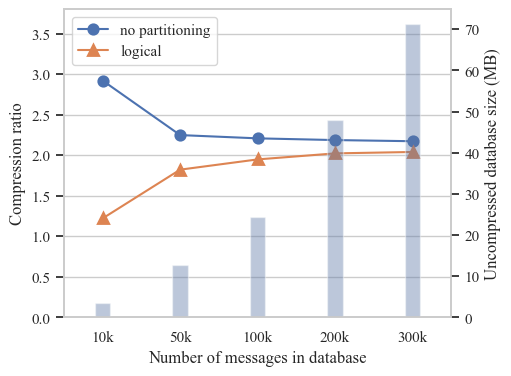

In [11]:
fig = plt.figure(figsize=(5, 4))
ax= fig.gca()
ax2=ax.twinx()
n = 100

# Uncompressed size
sns.barplot(data[(data.dist == "even") & (data.n == n) & (data.m > 5000)], x="m", y="raw_bytes_mb", ax=ax2, width=0.2, alpha=0.4)
ax2.set_ylabel("Uncompressed database size (MB)")
ax2.grid(False)

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.n == n) & (ndata.m > 5000)], x="m", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
for l in ax.lines:
    l.set_linewidth(1.5)

ax.set_ybound(0, 3.8)
ax.set_xlabel("Number of messages in database")
ax.set_ylabel("Compression ratio")
ax.legend(loc="upper left")
ax.set_xticklabels([f'{int(int(x.get_text())/1000)}k' for x in ax.get_xticklabels()])

fig.savefig("whatsapp_m_plot.png", dpi=300, bbox_inches='tight')

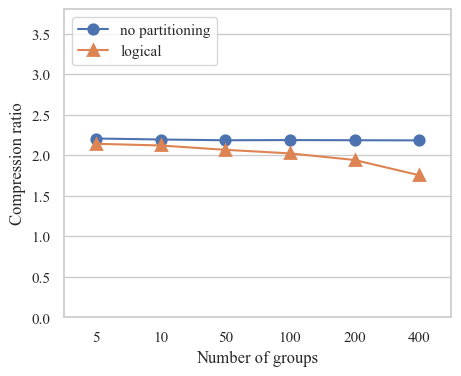

In [12]:
fig = plt.figure(figsize=(5, 4))
ax= fig.gca()
m = 200000

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.m == m)], x="n", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
for l in ax.lines:
    l.set_linewidth(1.5)
ax.set_ybound(0, 3.8)
ax.set_xlabel("Number of groups")
ax.set_ylabel("Compression ratio")
ax.legend(loc="upper left")

fig.savefig("whatsapp_n_plot.png", dpi=300, bbox_inches='tight')

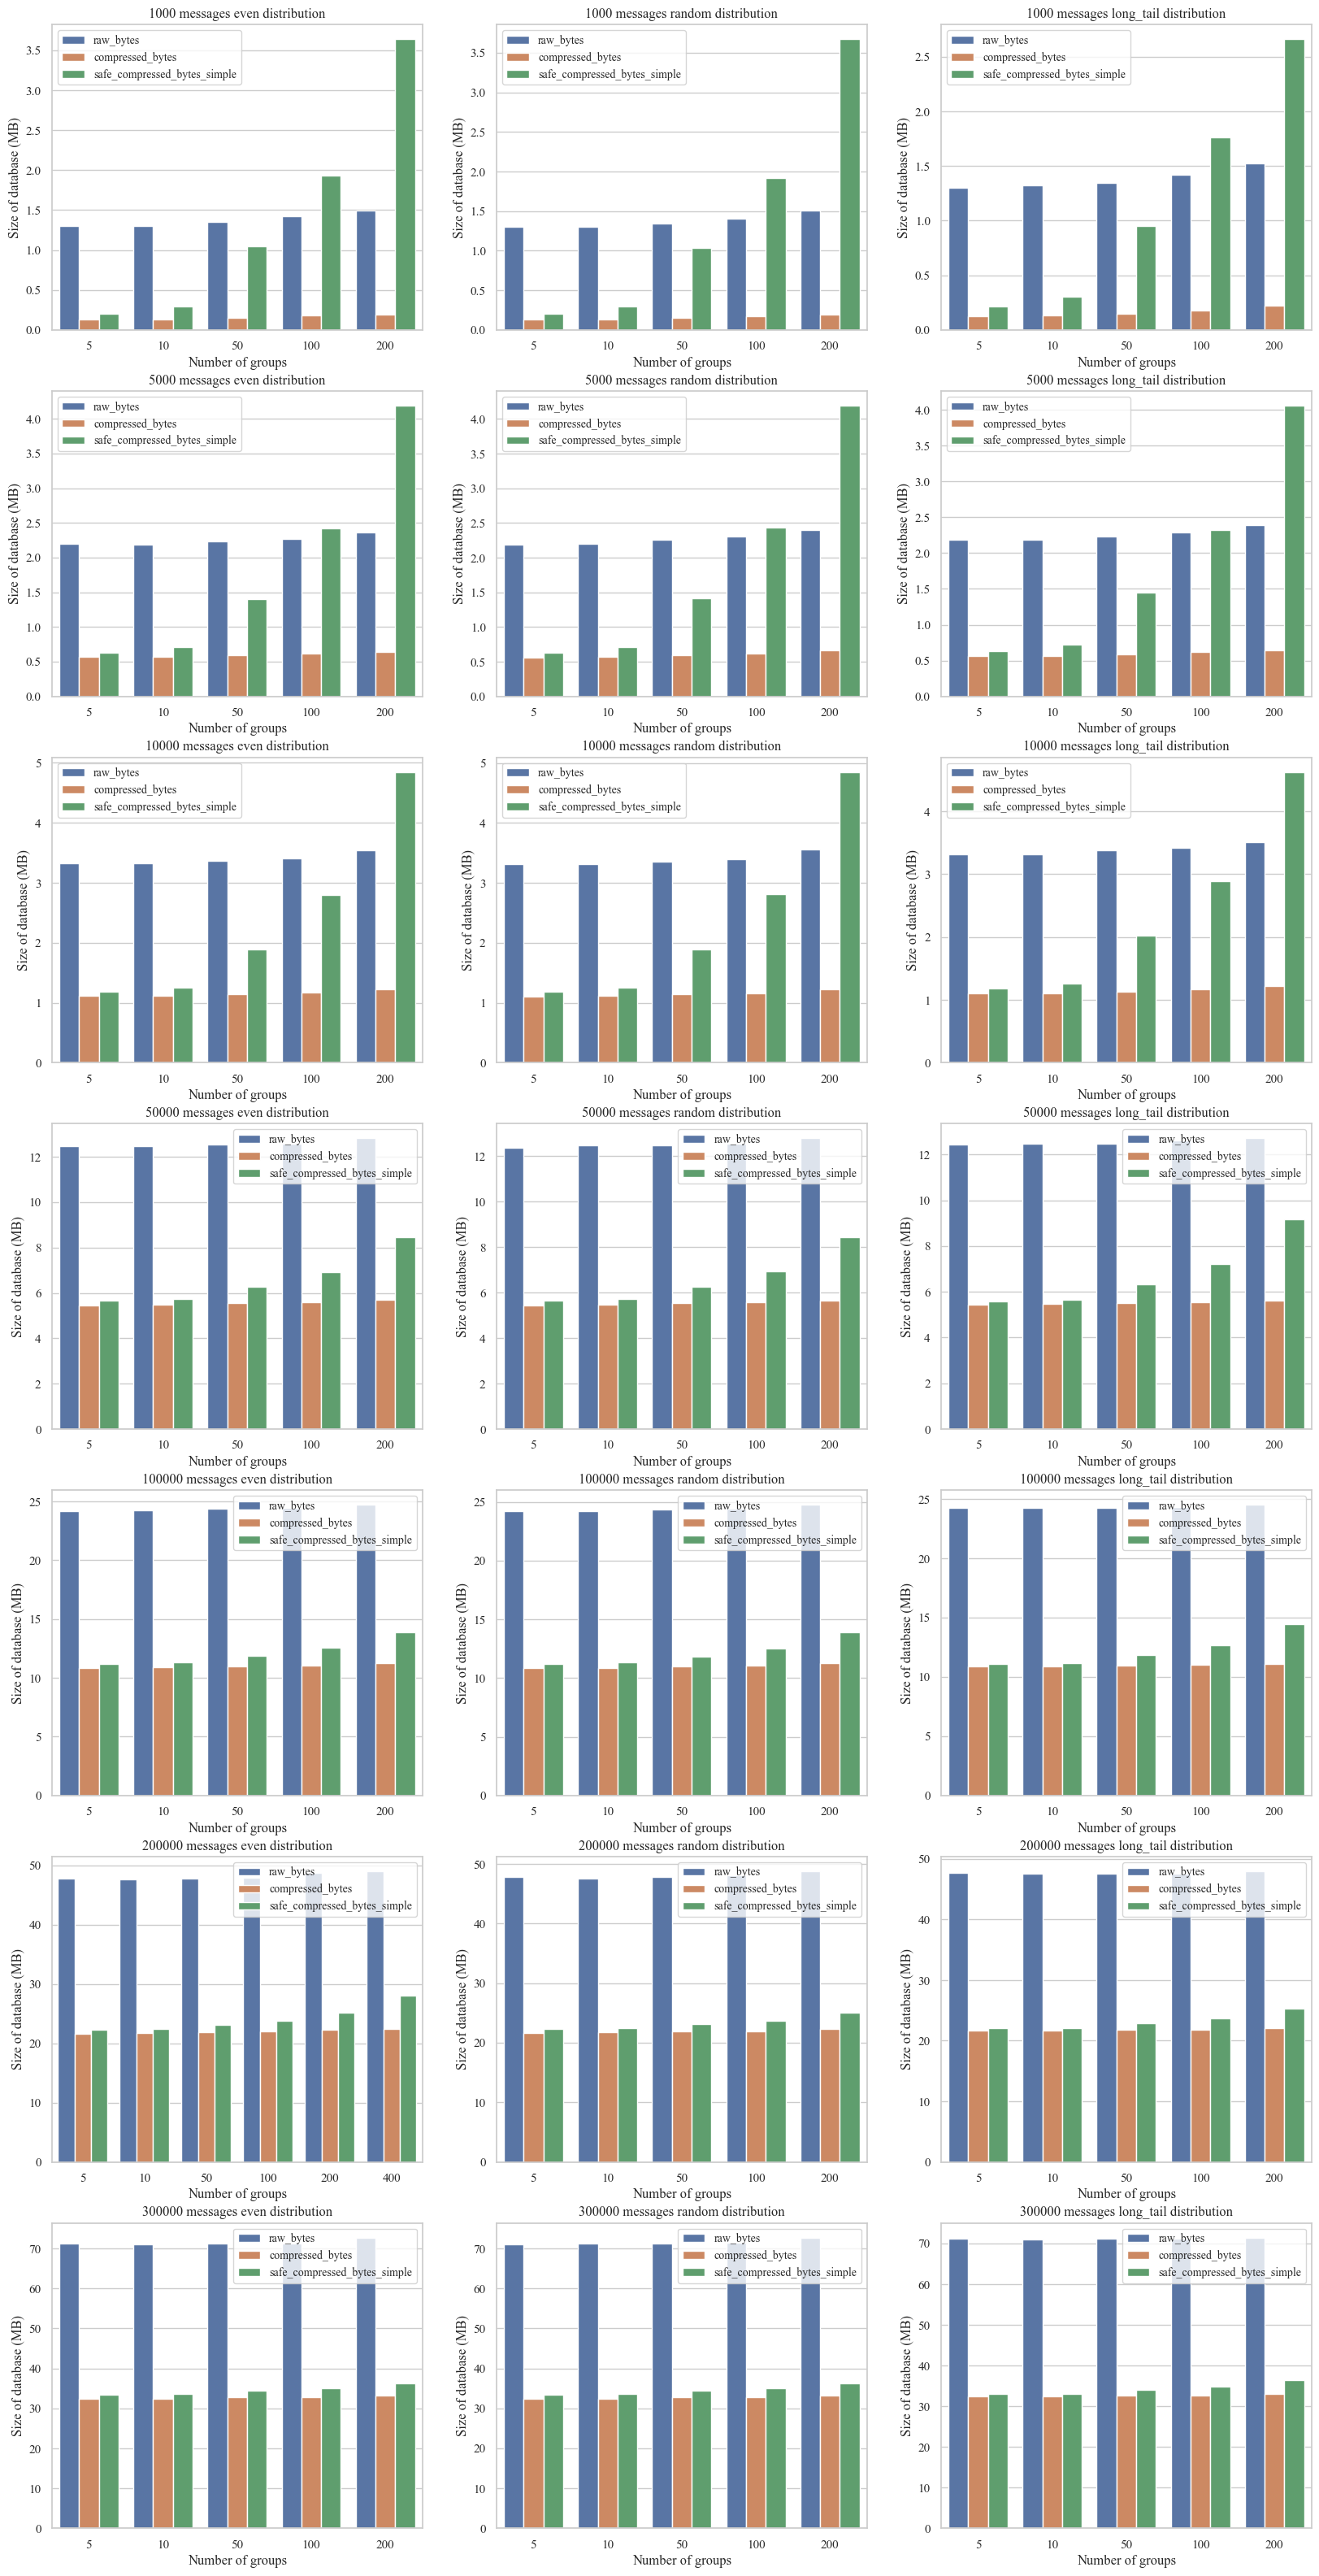

In [13]:
fig, axes = plt.subplots(data.m.nunique(), data.dist.nunique(), figsize=(20, 40))
for i, m in enumerate(data.m.unique()):
    for j, dist in enumerate(data.dist.unique()):
        sns.barplot(mdata[(mdata.m == m) & (mdata.dist == dist)], x="n", y="value_mb", hue="variable", ax=axes[i, j])
        axes[i, j].set_title(f"{m} messages {dist} distribution")
        axes[i, j].set_xlabel("Number of groups")
        axes[i, j].set_ylabel("Size of database (MB)")
        axes[i, j].legend(fontsize="small")
        
plt.savefig("/Users/sjb373/data/secure-compression-framework-lib/sjb_local/stats.png")

In [14]:
kdata = pd.read_csv("/Users/sjb373/data/secure-compression-framework-lib/sjb_local/stats_complete.csv")
kdata["compression_ratio"] = kdata.raw_bytes/kdata.compressed_bytes
kdata["simple_safe_compression_ratio"] = kdata.raw_bytes/kdata.safe_compressed_bytes_simple
kdata["advanced_safe_compression_ratio"] = kdata.raw_bytes/kdata.safe_compressed_bytes_advanced
kdata["raw_bytes_kb"] = kdata.raw_bytes/1000
kdata["raw_bytes_mb"] = kdata.raw_bytes/1000000
kdata.head()

,n,m,dist,random_password,raw_bytes,compressed_bytes,safe_compressed_bytes_simple,safe_compressed_bytes_advanced,compression_ratio,simple_safe_compression_ratio,advanced_safe_compression_ratio,raw_bytes_kb,raw_bytes_mb
0,2,100,even,True,307379,16222,18981,17092,18.948280,16.194036,17.983794,307.379,0.307379
1,2,100,random,True,300970,16459,19072,17282,18.286044,15.780726,17.415230,300.970,0.300970
2,2,100,long_tail,True,265369,15944,18394,16770,16.643816,14.426933,15.824031,265.369,0.265369
3,2,200,even,True,611560,30669,35596,31752,19.940657,17.180582,19.260519,611.560,0.611560
4,2,200,random,True,608671,30423,35454,31742,20.006936,17.167908,19.175572,608.671,0.608671


In [34]:
baseline_data = pd.concat([data[(data.n == 100) & (data.m == 200000) & (data.dist != "random")], kdata[(kdata.n == 10) & (kdata.m == 200) & (kdata.dist != "random")]])
baseline_data.dist = baseline_data.dist.str.replace("_", "-")
baseline_data = baseline_data.melt(id_vars=["n", "m", "dist", "raw_bytes", "compressed_bytes"], value_vars=["safe_compressed_bytes_simple", "safe_compressed_bytes_advanced"])
baseline_data["variable"] = baseline_data["variable"].map({"compressed_bytes": "no partitioning", "safe_compressed_bytes_simple": "physical", "safe_compressed_bytes_advanced": "logical"})
baseline_data["database"] = "WhatsApp"
baseline_data.loc[baseline_data.n == 10, "database"] = "KeePass"
baseline_data["database"] = baseline_data["database"] + "\n" + baseline_data["dist"] + " distribution"
baseline_data = baseline_data[baseline_data.value > 0]
baseline_data["compression_overhead"] = (((baseline_data["value"] / baseline_data["compressed_bytes"])-1)*100)
baseline_data["raw_bytes_mb"] = baseline_data.raw_bytes/1000000
baseline_data["raw_bytes_kb"] = baseline_data.raw_bytes/1000
baseline_data

,n,m,dist,raw_bytes,compressed_bytes,variable,value,database,compression_overhead,raw_bytes_mb,raw_bytes_kb
0,100,200000,even,47955968,21937565,physical,23719587,WhatsApp\neven distribution,8.123153,47.955968,47955.968
1,100,200000,long-tail,47636480,21833024,physical,23649030,WhatsApp\nlong-tail distribution,8.317703,47.636480,47636.480
2,10,200,even,733456,34645,physical,45221,KeePass\neven distribution,30.526772,0.733456,733.456
3,10,200,long-tail,526779,30246,physical,40075,KeePass\nlong-tail distribution,32.496859,0.526779,526.779
6,10,200,even,733456,34645,logical,40151,KeePass\neven distribution,15.892625,0.733456,733.456
7,10,200,long-tail,526779,30246,logical,36472,KeePass\nlong-tail distribution,20.584540,0.526779,526.779


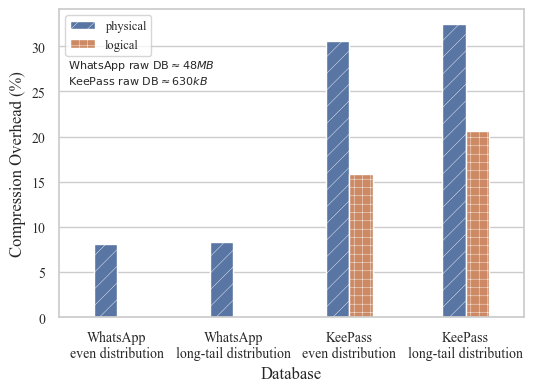

In [37]:
fig = plt.figure(figsize=(6, 4))
plt.rcParams['hatch.linewidth'] = 0.3
ax= fig.gca()
bar = sns.barplot(baseline_data, x="database", y="compression_overhead", hue="variable", ax=ax, width=0.4)

for i, bar in enumerate(ax.patches):
    if i in [0, 1, 2, 3, 6]:
        bar.set_hatch("//")
    else:
        bar.set_hatch("++")
    
ax.set_xlabel("Database")
ax.set_ylabel("Compression Overhead (%)")
ax.legend(loc="upper left", fontsize=9)
ax.tick_params(axis='both', which='major', labelsize=10)

whatsapp_size = baseline_data[baseline_data["database"].str.contains("WhatsApp")].raw_bytes_mb.mean()
keepass_size = baseline_data[baseline_data["database"].str.contains("KeePass")].raw_bytes_kb.mean()
textstr = '\n'.join((
    r'$\text{WhatsApp raw size}\approx%.0fMB$' % (whatsapp_size, ),
    r'$\text{KeePass raw size}\approx%.0fkB$' % (keepass_size, ),))
ax.text(0.02, 0.84, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top')

fig.savefig("baseline.png", dpi=300, bbox_inches='tight')